In [19]:
import numpy as np
from numpy.lib.function_base import quantile
import pandas as pd
from datetime import datetime
np.set_printoptions(suppress=True)
%matplotlib inline
%cd C:\Users\ilysh\Untitled Folder 1\pqr    
looking_period = [1, 3, 6, 9, 12]
lag = 1
holding_period = [1, 3, 6, 9, 12]
quantile_step = 0.2
liquidity_threshold = 1000000
fee_rate= 0.0005

C:\Users\ilysh\Untitled Folder 1\pqr


Download data from YF for simplicity. In general, it is better to use data sets with full market coverage.

In [3]:
stock_list = ['NESN.SW', 'ROG.SW', 'ABBN.SW', 'CB', 'CFR.SW', 'ZURN.SW', 'UBSG.SW', 'TEL', 'LONN.SW', 'GLEN.L', 'SIKA.SW', 'GIVN.SW', 'KNIN.SW', 'PGHN.SW', 'HOLN.SW', 'SCHP.SW', 'SREN.SW', 'STM.F', 'GRMN', 'SCMN.SW', 'CSGN.SW', 'GEBN.SW', 'STMN.SW', 'LISN.SW', 'SGSN.SW', 'SOON.SW', 'EMSN.SW', 'LOGN.SW', 'FOI-B.ST', 'UHR.SW', 'SLHN.SW', 'BAER.SW', 'BARN.SW', 'TEMN.SW', 'ADEN.SW', 'CCH.L', 'VIFN.SW', 'BCVN.SW', 'BALN.SW', 'SPSN.SW', 'BANB.SW', 'CLN.SW', 'HELN.SW', 'PSPN.SW', 'BKW.SW', 'TECN.SW', 'DAE.SW']
start_date = datetime(2016,1,1) # YYYY-MM-DD
end_date = datetime(2021,4,30)

import pandas_datareader.data as web

stocks_request = web.DataReader(stock_list, 'yahoo', start_date, end_date)
stocks_price = pd.DataFrame(stocks_request['Adj Close'])
monthly_price = stocks_price.resample(rule='M').last()

stocks_volume = pd.DataFrame(stocks_request['Volume'])
stocks_volume *= stocks_price
monthly_volume = stocks_volume.resample(rule='M').mean()

price = monthly_price.values
volume = monthly_volume.values
dates = np.array(monthly_price.index)

In [4]:
import matplotlib.pyplot as plt

Prepare prices for testing the Momentum factor

In [18]:
from pqr.data_preprocessing import get_factor
from pqr.data_preprocessing import set_stock_universe
from pqr.portfolios_formation import get_all_quantiles
from pqr.portfolios_formation import set_equal_weights
from pqr.costs import get_fee_costs
from pqr.portfolio_return import get_universe_return
from pqr.portfolio_return import get_portfolio_return
from pqr.portfolio_return import compare_portfolios
from pqr.benchmark import get_benchmark

C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.53 │         -0.36 │          0.32 │          0.24 │          -0.16 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.78 │         -1.5  │          1.28 │          1.04 │          -0.61 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.75 │          0.76 │          1.38 │          1.32 │           0.99 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.11 │          0.83 │          1.57 │          1.42 │           1.3  │


C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:97: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:137: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights.append(positions_lists[i] / positions_sum[:,None])
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:133: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights = positions_lists / positions_sum[:,None]
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold),


╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.15 │         -0.78 │          0.37 │          0.37 │          -0.12 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -0.56 │         -3.38 │          1.65 │          1.54 │          -0.47 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.98 │          0.5  │          1.46 │          1.43 │           1.03 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.23 │          0.61 │          1.41 │          1.63 │           1.27 │

C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:137: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights.append(positions_lists[i] / positions_sum[:,None])
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:133: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights = positions_lists / positions_sum[:,None]
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.33 │         -0.52 │          0.28 │         -0.19 │          -0.14 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.48 │         -2.4  │          1.32 │         -0.85 │          -0.51 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.84 │          0.64 │          1.39 │          0.99 │           0.98 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.98 │          0.7  │          1.48 │          1.23 │           1.2  │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.44 │         -0.23 │          0.39 │          0.33 │          -0.09 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.45 │         -0.93 │          1.57 │          1.42 │          -0.34 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.76 │          0.82 │          1.38 │          1.35 │           0.99 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.11 │          0.87 │          1.55 │          1.42 │           1.29 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.09 │         -0.71 │          0.42 │          0.42 │          -0.05 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -0.33 │         -3.14 │          1.92 │          1.84 │          -0.22 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.98 │          0.5  │          1.46 │          1.43 │           1.03 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.23 │          0.61 │          1.41 │          1.63 │           1.27 │


C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:97: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:137: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights.append(positions_lists[i] / positions_sum[:,None])
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:133: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights = pos

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.27 │         -0.46 │          0.34 │         -0.13 │          -0.08 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.24 │         -2.17 │          1.64 │         -0.58 │          -0.29 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.84 │          0.64 │          1.39 │          0.99 │           0.98 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.98 │          0.7  │          1.48 │          1.23 │           1.2  │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.49 │         -0.25 │          0.32 │          0.26 │          -0.34 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.7  │         -1.06 │          1.34 │          1.15 │          -1.48 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.7  │          0.78 │          1.3  │          1.26 │           0.78 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.01 │          0.84 │          1.46 │          1.32 │           0.97 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.32 │         -0.81 │          0.25 │          0.36 │          -0.23 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.35 │         -3.85 │          1.24 │          1.69 │          -1.01 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.78 │          0.39 │          1.28 │          1.36 │           0.86 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.96 │          0.48 │          1.21 │          1.53 │           1.05 │


C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:97: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:137: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights.append(positions_lists[i] / positions_sum[:,None])
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:133: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights = positions_lists / positions_sum[:,None]
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold),

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.35 │         -0.4  │         -0.03 │          0.03 │           0.01 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.65 │         -1.66 │         -0.13 │          0.13 │           0.07 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.83 │          0.71 │          0.98 │          1.03 │           1.04 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.13 │          0.89 │          0.93 │          1.03 │           1.16 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.57 │         -0.17 │          0.39 │          0.15 │          -0.34 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -2.01 │         -0.75 │          1.66 │          0.69 │          -1.53 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.6  │          0.81 │          1.32 │          1.12 │           0.74 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.86 │          0.86 │          1.47 │          1.16 │           0.92 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.47 │         -0.62 │          0.15 │          0.1  │           0.17 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -2.16 │         -2.93 │          0.71 │          0.44 │           0.8  │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.65 │          0.46 │          1.13 │          1.08 │           1.15 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.84 │          0.53 │          1.1  │          1.23 │           1.38 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.38 │         -0.52 │          0.1  │         -0.34 │          -0.37 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.74 │         -2.46 │          0.48 │         -1.48 │          -1.49 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.67 │          0.5  │          1.08 │          0.73 │           0.66 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.76 │          0.54 │          1.14 │          0.9  │           0.78 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.47 │         -0.19 │          0.41 │          0.14 │          -0.38 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.73 │         -0.87 │          1.8  │          0.66 │          -1.81 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.55 │          0.68 │          1.23 │          1    │           0.59 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.79 │          0.71 │          1.38 │          1.04 │           0.72 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in greater
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < thr

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.35 │         -0.78 │          0.29 │          0.34 │          -0.16 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.51 │         -3.7  │          1.48 │          1.65 │          -0.71 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.6  │          0.24 │          1.17 │          1.19 │           0.75 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.73 │          0.29 │          1.09 │          1.34 │           0.92 │


C:\Users\ilysh\Untitled Folder 1\pqr\data_preprocessing.py:85: RuntimeWarning: invalid value encountered in less
  filter_factor = np.where((filter_factor > min_threshold) & (filter_factor < max_threshold), 1, 0)
C:\Users\ilysh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (

C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:90: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:106: RuntimeWarning: invalid value encountered in less
  positions_arrays.append(np.where((factor > previous_threshold[:,None]) & (factor < threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:97: RuntimeWarning: invalid value encountered in greater
  positions_arrays.append(np.where((factor > previous_threshold[:,None]), 1, 0))
C:\Users\ilysh\Untitled Folder 1\pqr\portfolios_formation.py:137: RuntimeWarning: invalid value encountered in true_divide
  portfolio_weights.append(posit

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.4  │         -0.38 │         -0.12 │         -0.01 │          -0.11 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.69 │         -1.44 │         -0.57 │         -0.04 │          -0.49 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.59 │          0.54 │          0.7  │          0.82 │           0.76 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.78 │          0.64 │          0.65 │          0.8  │           0.78 │


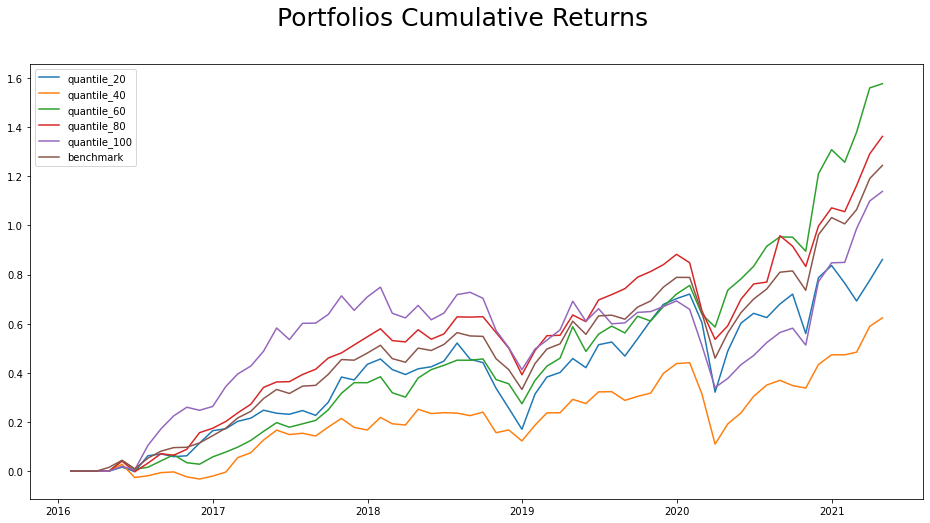

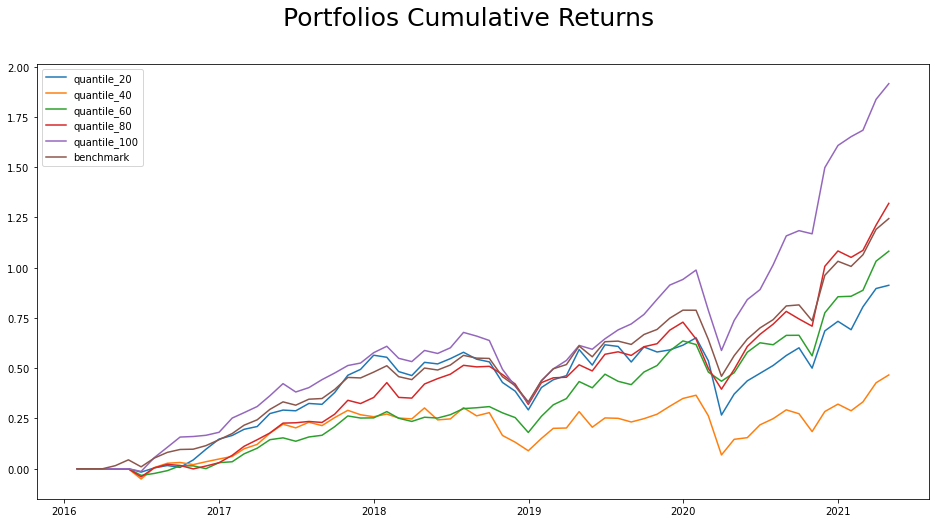

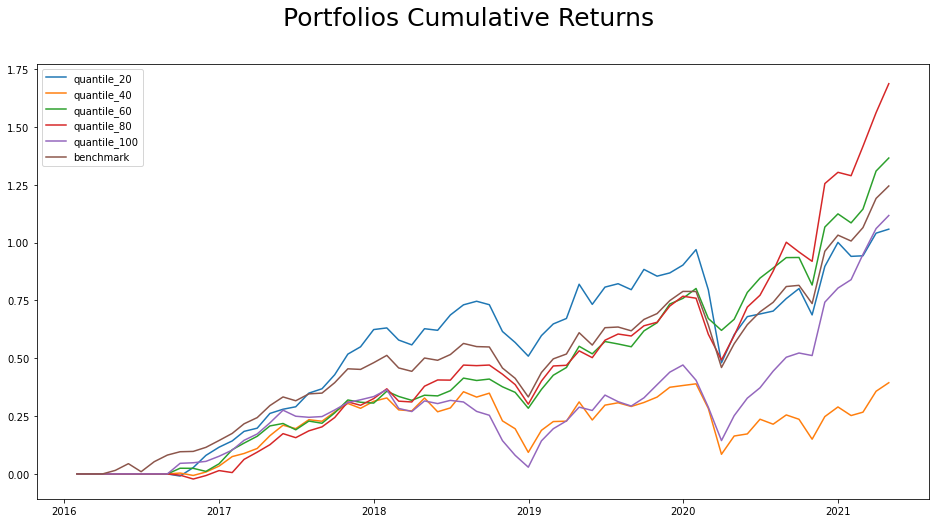

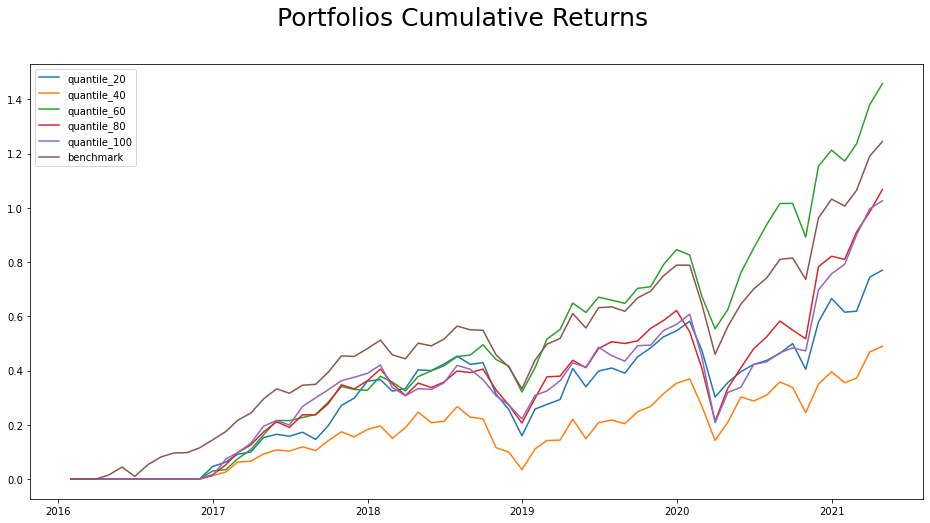

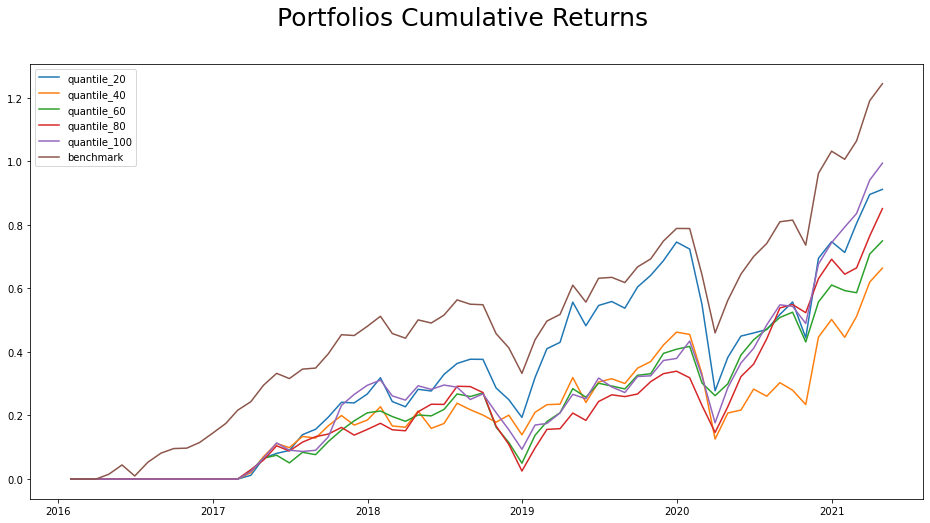

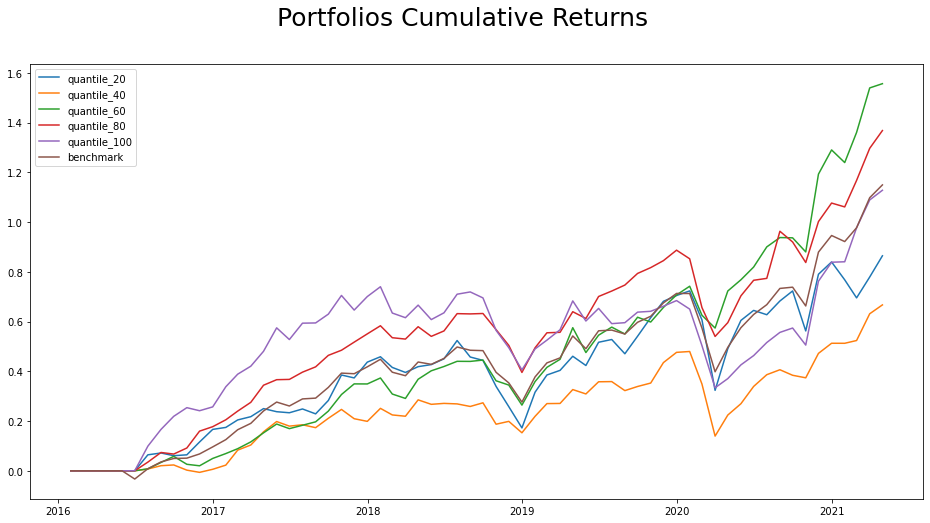

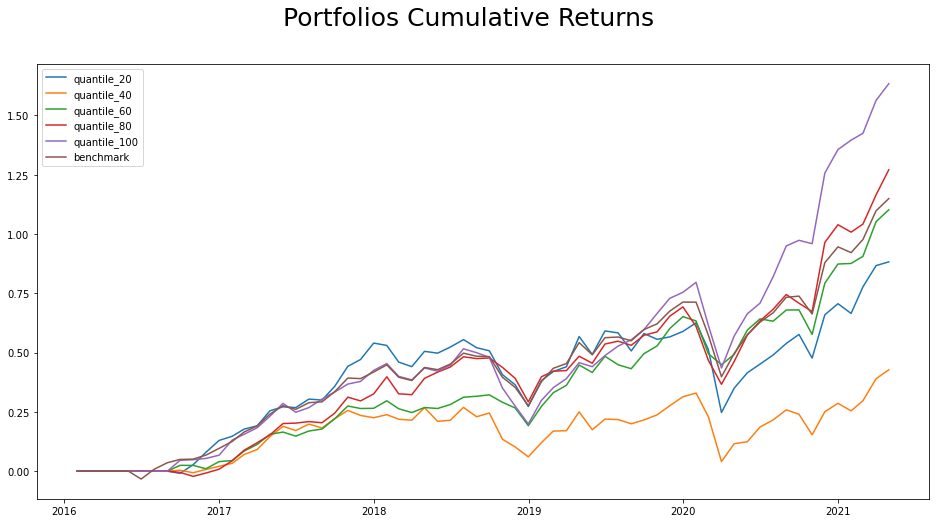

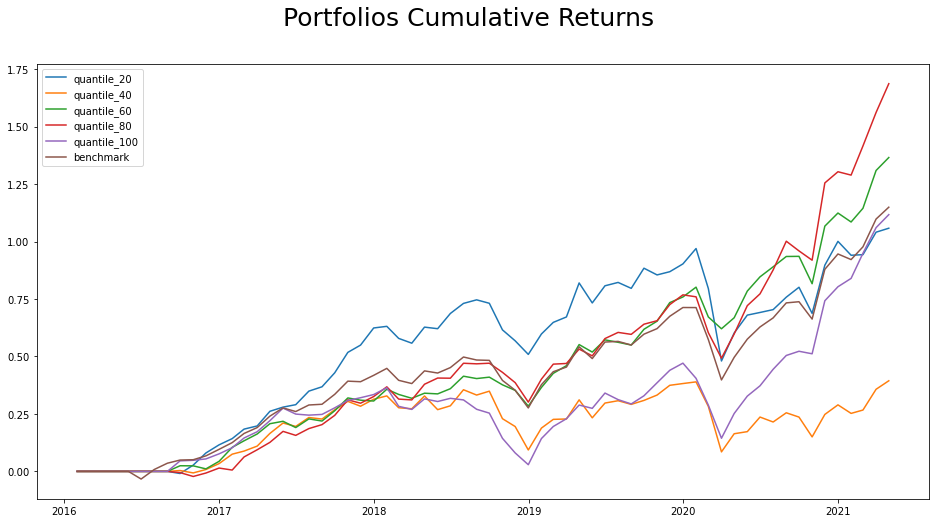

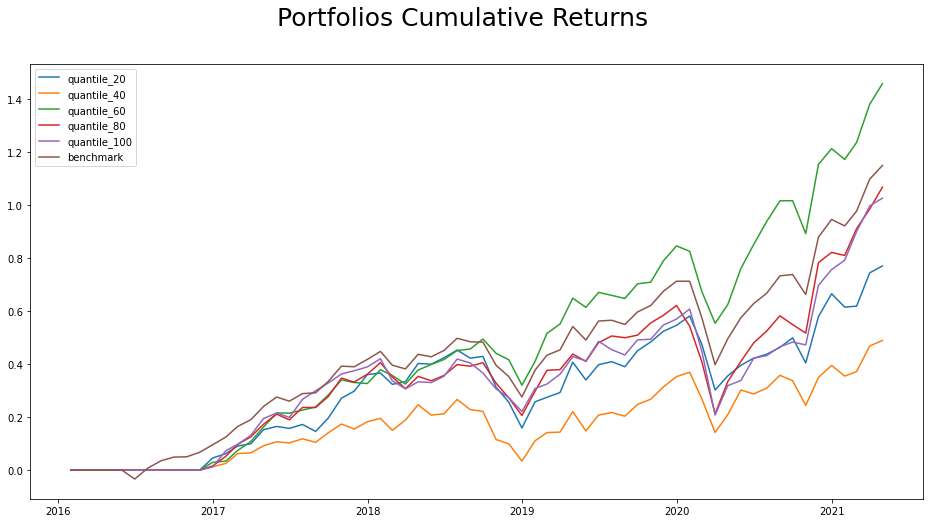

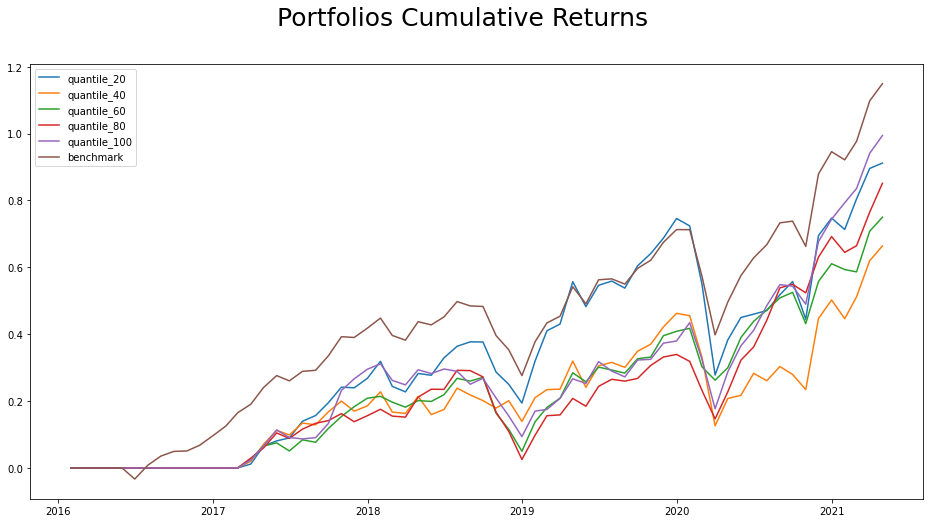

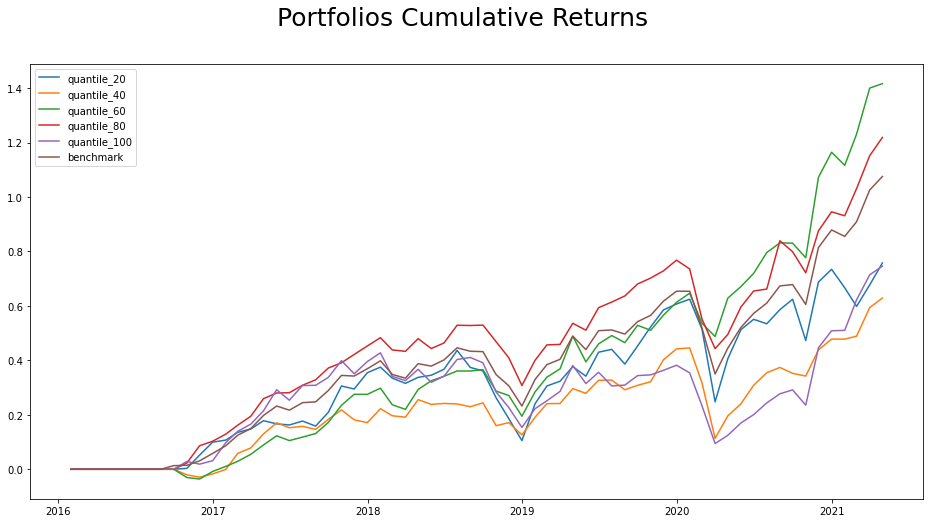

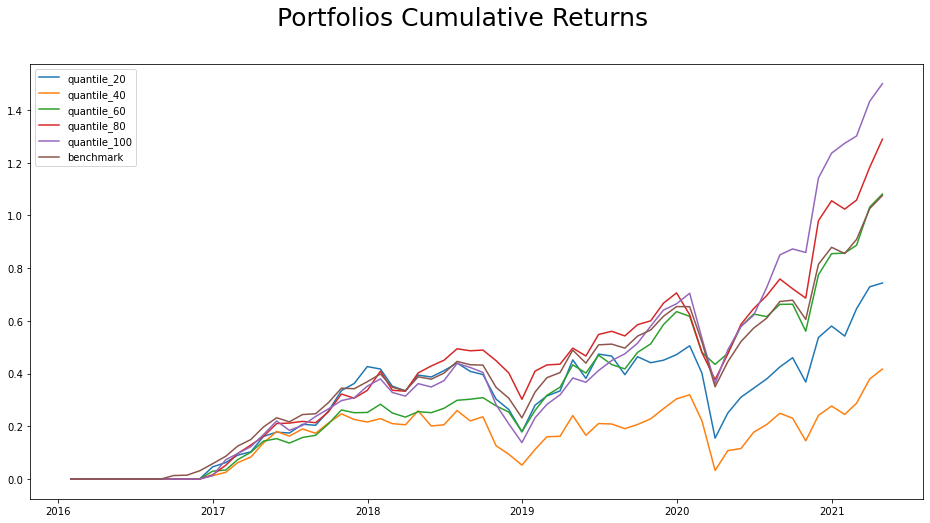

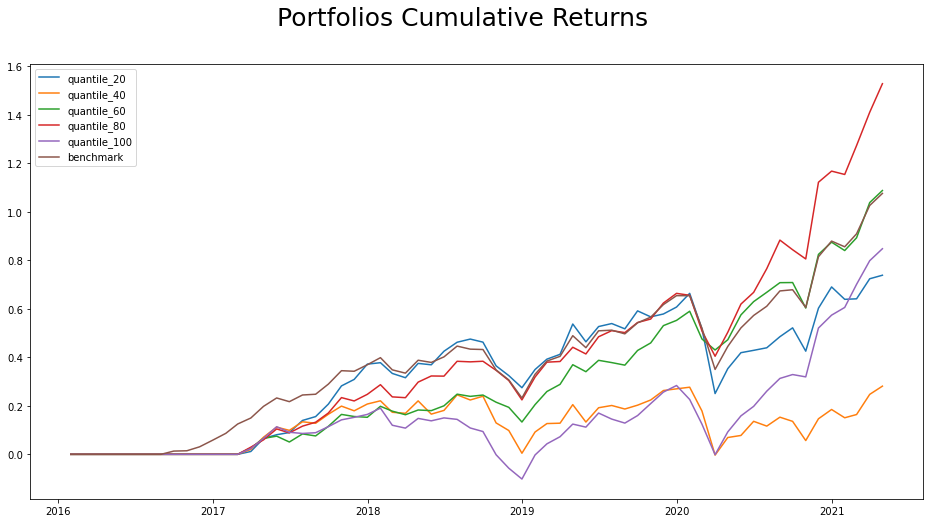

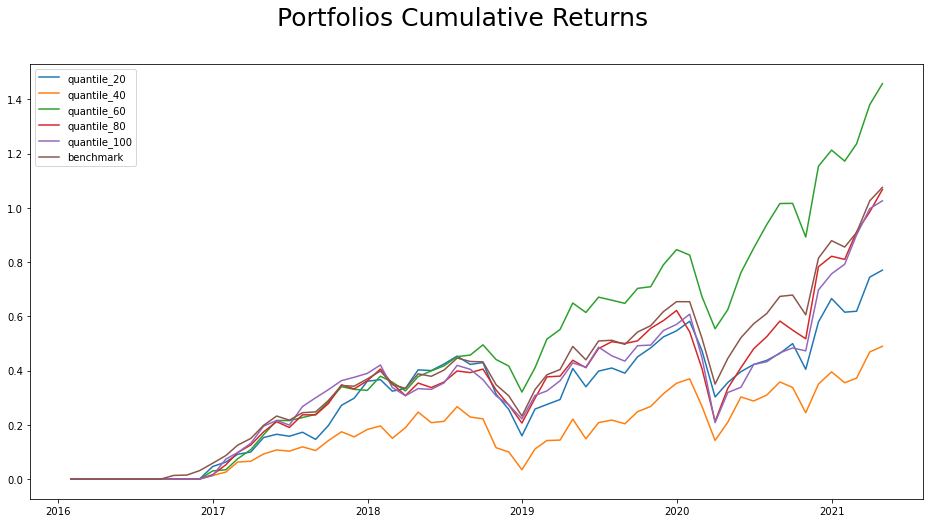

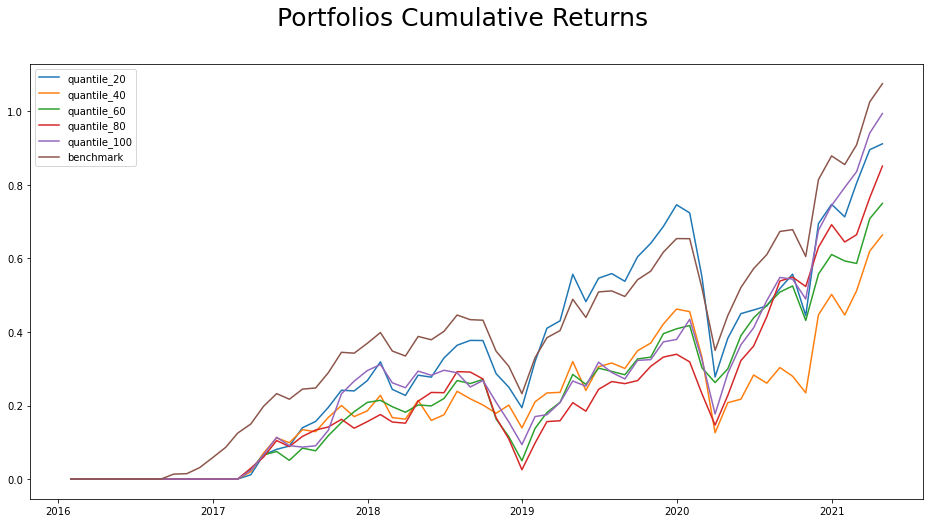

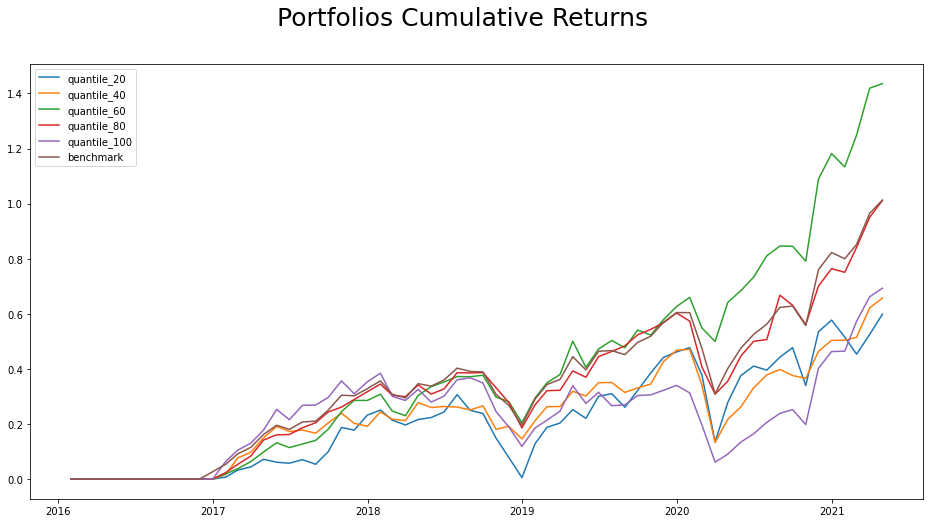

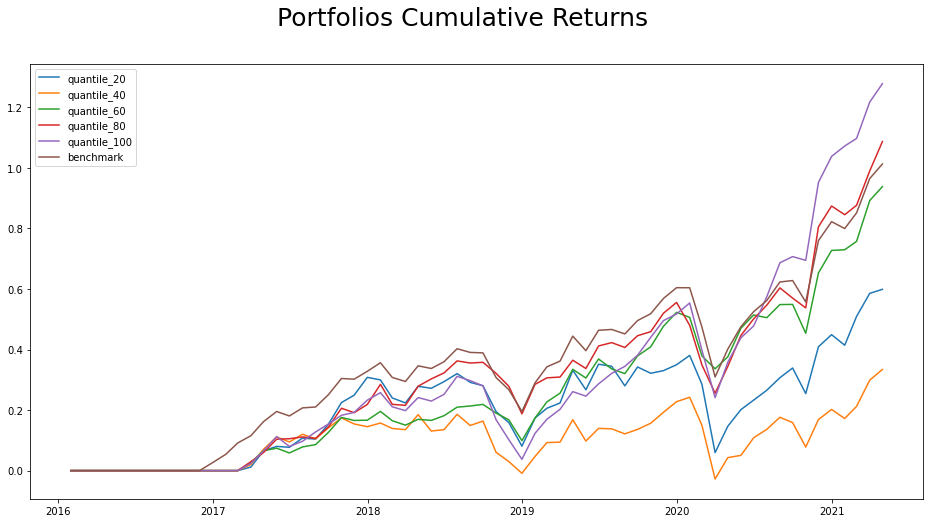

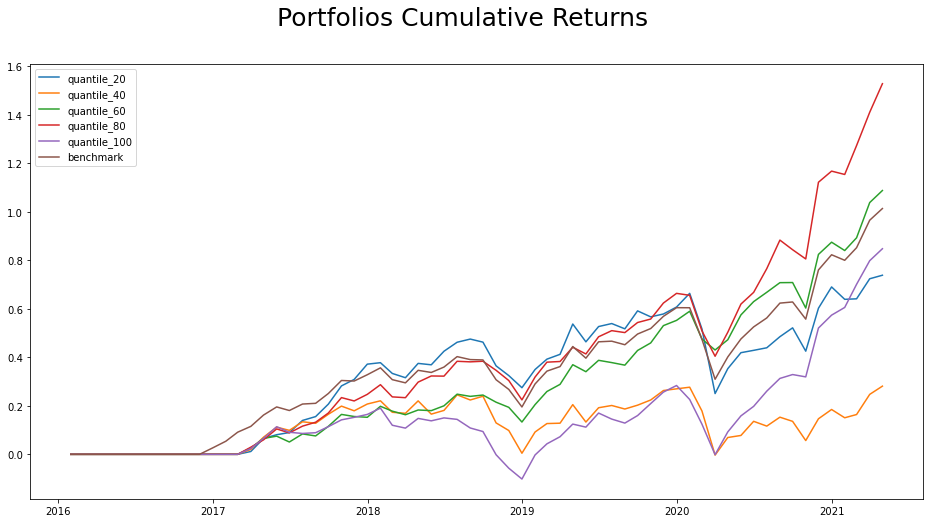

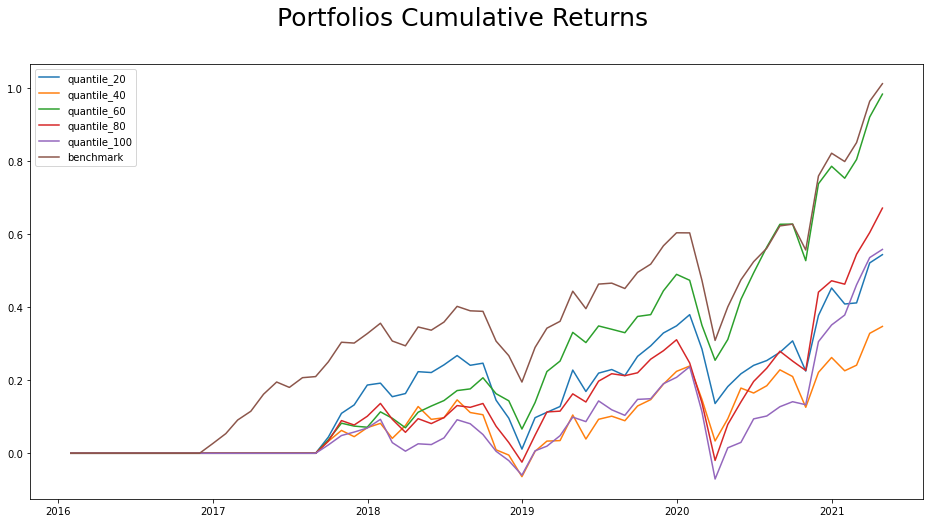

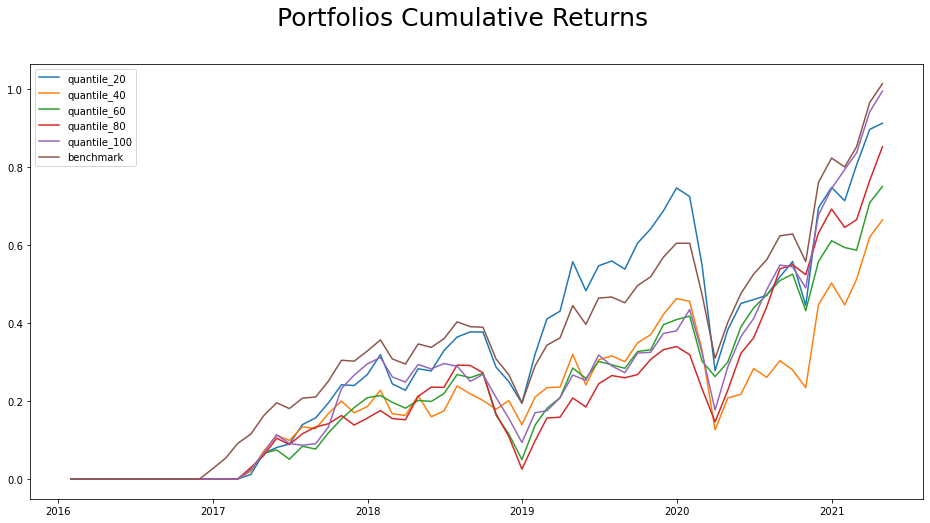

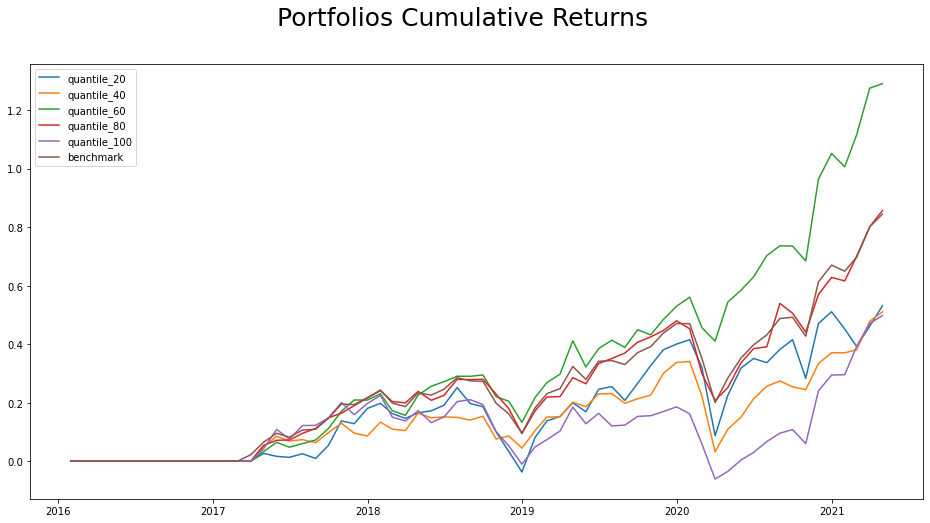

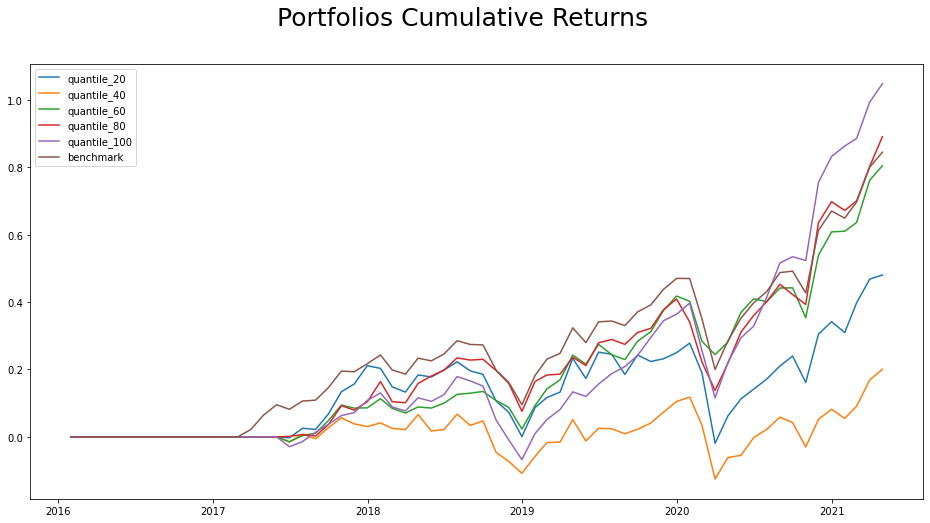

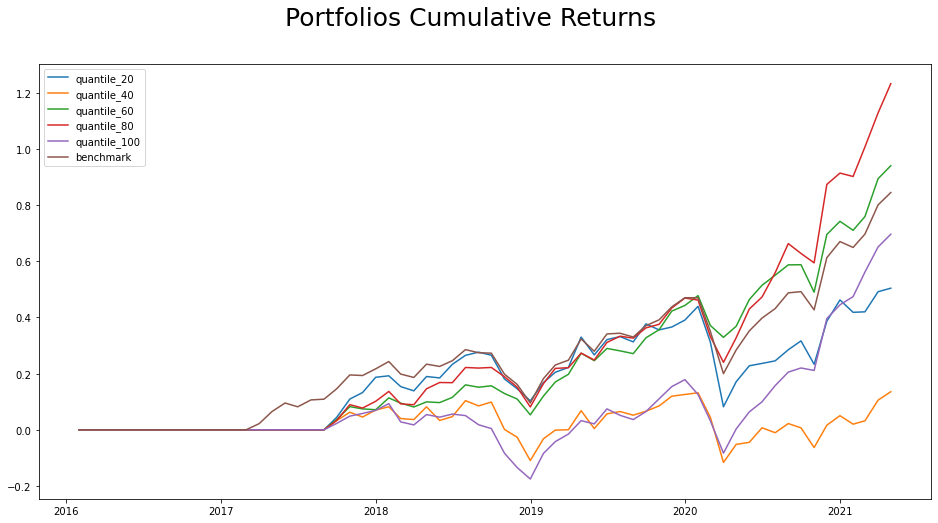

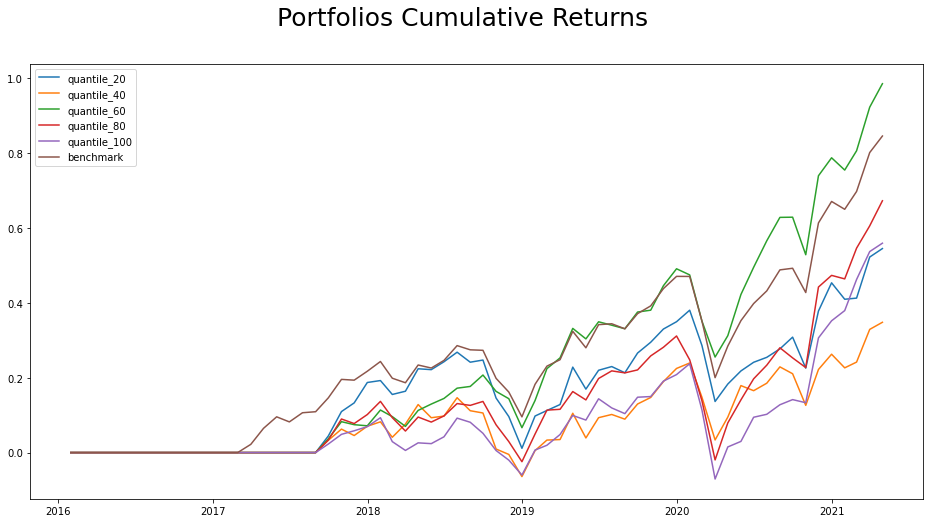

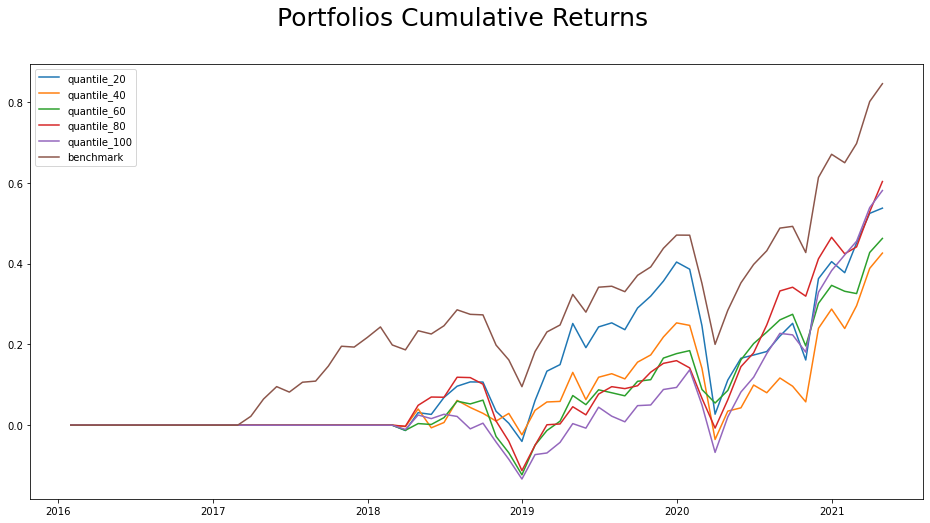

In [21]:
for i in looking_period:
    for j in holding_period:
        momentum_factor = get_factor(price, static=False, looking_period=i, lag=lag)
        momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
        momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=j, static=False)
        momentum_portfolio = set_equal_weights(momentum_positions)
        fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
        universe_return = get_universe_return(price)
        momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
        benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)
        momentum_results = compare_portfolios(momentum_names, momentum_portfolio_return, benchmark_return, dates)

In [98]:
momentum_factor = get_factor(price, static=False, looking_period=3, lag=lag)
momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=3, static=False)
momentum_portfolio = set_equal_weights(momentum_positions)
fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
universe_return = get_universe_return(price)
momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)

In [24]:
import statsmodels.api as sm

In [40]:
benchmark_ret = pd.DataFrame(benchmark_return).fillna(0).T.sum()

In [44]:
moment_ret = pd.DataFrame(momentum_portfolio_return[4]).fillna(0).T.sum()

In [48]:
X = benchmark_ret
y = moment_ret

X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     282.0
Date:                Sun, 30 May 2021   Prob (F-statistic):           9.43e-25
Time:                        22:07:02   Log-Likelihood:                 167.10
No. Observations:                  64   AIC:                            -330.2
Df Residuals:                      62   BIC:                            -325.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.002      1.354      0.181      -0.002       0.008
0              1.0132      0.060     16.794      0.000       0.893       1.134
==============================================================================
Omnibus:                        0.214   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.385
Skew:                           0.102   Prob(JB):                        0.825
Kurtosis:                       2.679   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'return')

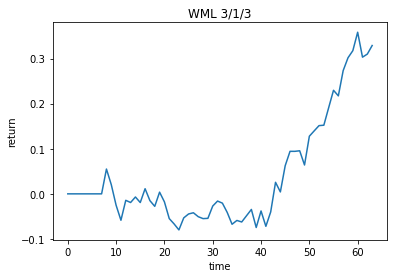

In [100]:
WML = np.array(pd.DataFrame(np.array(pd.DataFrame(momentum_portfolio_return[4]).fillna(0)) - np.array(pd.DataFrame(momentum_portfolio_return[0]).fillna(0))).T.sum())
WML_return = []
s = 0
for i in WML:
    s += i
    WML_return.append(s)
plt.plot(WML_return)
plt.title('WML 3/1/3')
plt.xlabel('time')
plt.ylabel('return')

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.3  │         -0.6  │          0.21 │          0.15 │           0.32 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.19 │         -2.67 │          0.96 │          0.64 │           1.35 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.84 │          0.55 │          1.25 │          1.19 │           1.33 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.1  │          0.64 │          1.22 │          1.37 │           1.61 │


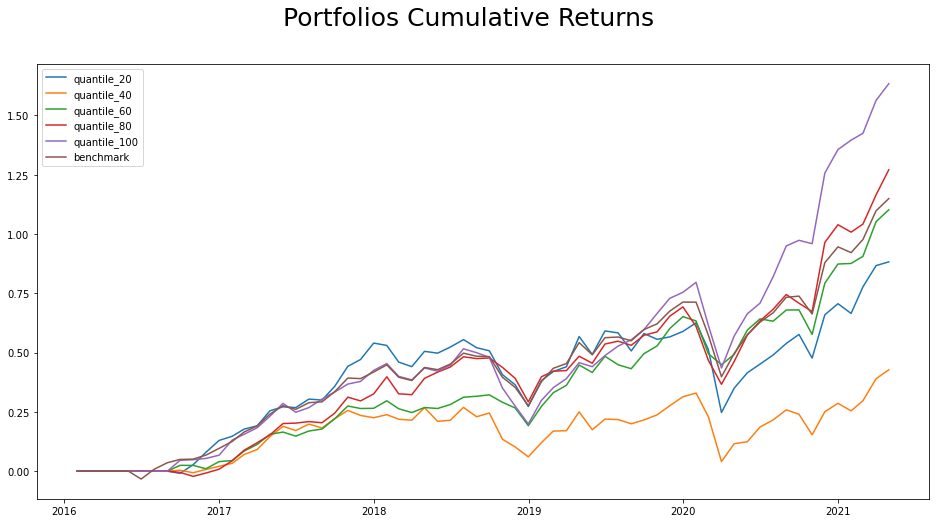

In [46]:
momentum_results = compare_portfolios(momentum_names, momentum_portfolio_return, benchmark_return, dates)

In [91]:
momentum_factor = get_factor(price, static=False, looking_period=1, lag=lag)
momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=3, static=False)
momentum_portfolio = set_equal_weights(momentum_positions)
fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
universe_return = get_universe_return(price)
momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)

benchmark_ret = pd.DataFrame(benchmark_return).fillna(0).T.sum()
moment_ret = pd.DataFrame(momentum_portfolio_return[4]).fillna(0).T.sum()

X = benchmark_ret
y = moment_ret

X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     325.9
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.26e-26
Time:                        16:20:47   Log-Likelihood:                 169.87
No. Observations:                  64   AIC:                            -335.7
Df Residuals:                      62   BIC:                            -331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.002      1.640      0.106      -0.001       0.008
0              1.0436      0.058     18.053      0.000       0.928       1.159
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.367
Skew:                           0.246   Prob(JB):                        0.306
Kurtosis:                       2.197   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'return')

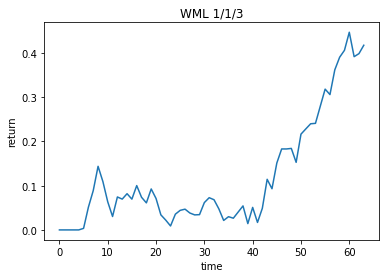

In [95]:
WML = np.array(pd.DataFrame(np.array(pd.DataFrame(momentum_portfolio_return[4]).fillna(0)) - np.array(pd.DataFrame(momentum_portfolio_return[0]).fillna(0))).T.sum())
WML_return = []
s = 0
for i in WML:
    s += i
    WML_return.append(s)
plt.plot(WML_return)
plt.title('WML 1/1/3')
plt.xlabel('time')
plt.ylabel('return')

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.37 │         -0.68 │          0.12 │          0.07 │           0.38 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.52 │         -3.23 │          0.55 │          0.34 │           1.64 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.86 │          0.58 │          1.22 │          1.2  │           1.45 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          1.12 │          0.69 │          1.21 │          1.4  │           1.78 │


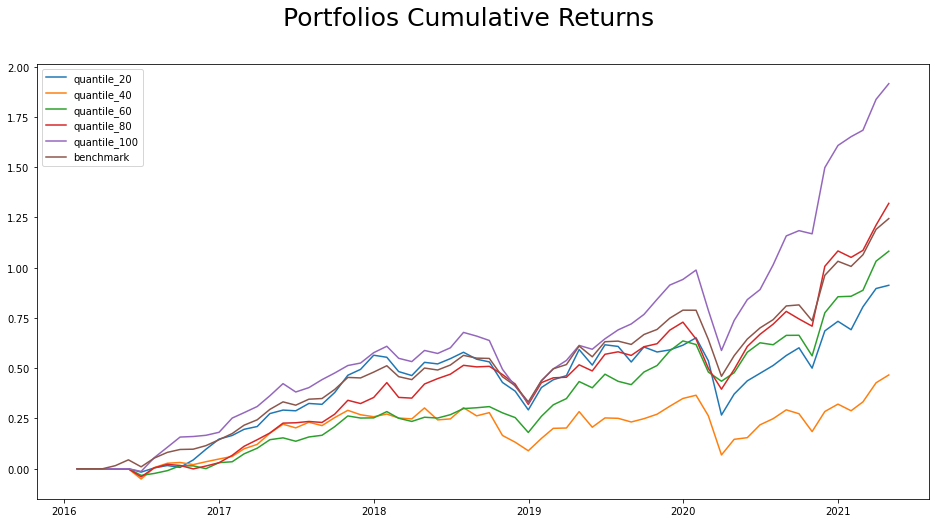

In [96]:
momentum_results = compare_portfolios(momentum_names, momentum_portfolio_return, benchmark_return, dates)

In [53]:
momentum_factor = get_factor(price, static=False, looking_period=6, lag=lag)
momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=3, static=False)
momentum_portfolio = set_equal_weights(momentum_positions)
fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
universe_return = get_universe_return(price)
momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)

benchmark_ret = pd.DataFrame(benchmark_return).fillna(0).T.sum()
moment_ret = pd.DataFrame(momentum_portfolio_return[4]).fillna(0).T.sum()

X = benchmark_ret
y = moment_ret

X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     379.4
Date:                Sun, 30 May 2021   Prob (F-statistic):           4.08e-28
Time:                        22:44:58   Log-Likelihood:                 175.20
No. Observations:                  64   AIC:                            -346.4
Df Residuals:                      62   BIC:                            -342.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.002      1.198      0.236      -0.002       0.007
0              1.0517      0.054     19.478      0.000       0.944       1.160
==============================================================================
Omnibus:                        3.356   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                3.280
Skew:                           0.520   Prob(JB):                        0.194
Kurtosis:                       2.614   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
momentum_factor = get_factor(price, static=False, looking_period=6, lag=lag)
momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=3, static=False)
momentum_portfolio = set_equal_weights(momentum_positions)
fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
universe_return = get_universe_return(price)
momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)

benchmark_ret = pd.DataFrame(benchmark_return).fillna(0).T.sum()
moment_ret = pd.DataFrame(momentum_portfolio_return[2]).fillna(0).T.sum()

X = benchmark_ret
y = moment_ret

X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     266.4
Date:                Mon, 31 May 2021   Prob (F-statistic):           4.02e-24
Time:                        16:29:54   Log-Likelihood:                 179.15
No. Observations:                  64   AIC:                            -354.3
Df Residuals:                      62   BIC:                            -350.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.002      1.022      0.311      -0.002       0.006
0              0.8285      0.051     16.321      0.000       0.727       0.930
==============================================================================
Omnibus:                       15.529   Durbin-Watson:                   2.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.219
Skew:                           0.755   Prob(JB):                     4.52e-07
Kurtosis:                       5.945   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(benchmark_ret.sum(), moment_ret.sum())

0.814577488738752 0.9923002676672198


Text(0, 0.5, 'return')

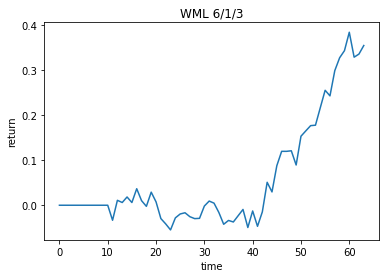

In [103]:
WML = np.array(pd.DataFrame(np.array(pd.DataFrame(momentum_portfolio_return[4]).fillna(0)) - np.array(pd.DataFrame(momentum_portfolio_return[0]).fillna(0))).T.sum())
WML_return = []
s = 0
for i in WML:
    s += i
    WML_return.append(s)
plt.plot(WML_return)
plt.title('WML 6/1/3')
plt.xlabel('time')
plt.ylabel('return')

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╕
│                │   quantile_20 │   quantile_40 │   quantile_60 │   quantile_80 │   quantile_100 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════╡
│ Alpha %        │         -0.41 │         -0.59 │          0.2  │          0.17 │           0.25 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ Alpha t        │         -1.97 │         -2.92 │          1.02 │          0.85 │           1.2  │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ SR             │          0.75 │          0.55 │          1.23 │          1.21 │           1.27 │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼────────────────┤
│ MR %           │          0.98 │          0.63 │          1.21 │          1.38 │           1.53 │


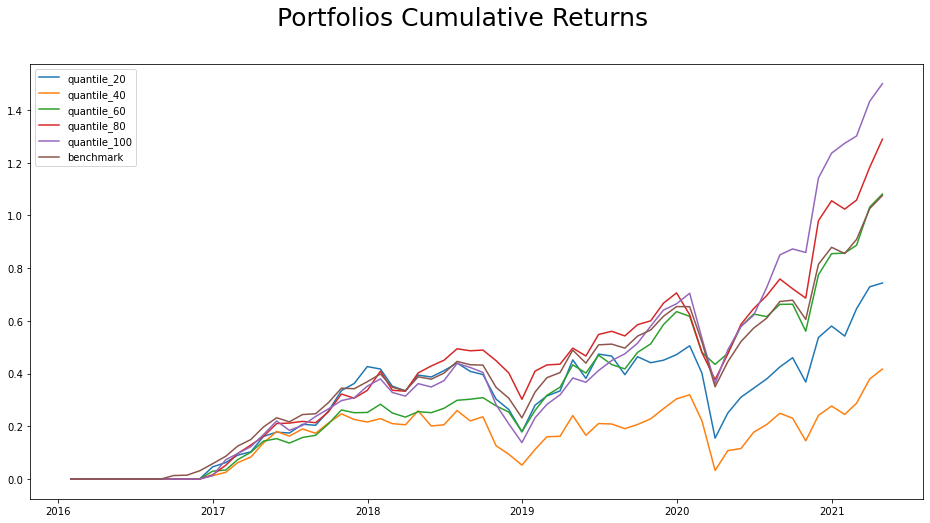

In [104]:
momentum_results = compare_portfolios(momentum_names, momentum_portfolio_return, benchmark_return, dates)

In [106]:
momentum_factor = get_factor(price, static=False, looking_period=1, lag=lag)
momentum_factor = set_stock_universe(momentum_factor, volume, min_threshold=liquidity_threshold)
momentum_positions, momentum_names = get_all_quantiles(momentum_factor, quantile_step=quantile_step,
                                                       holding_period=3, static=False)
momentum_portfolio = set_equal_weights(momentum_positions)
fee = get_fee_costs(momentum_portfolio, fee_rate=fee_rate)
universe_return = get_universe_return(price)
momentum_portfolio_return = get_portfolio_return(momentum_portfolio, universe_return, fee_lists=fee)
benchmark_return = get_benchmark(price, momentum_factor, universe_return, equal_weights=True)

wml monthly return 0.653


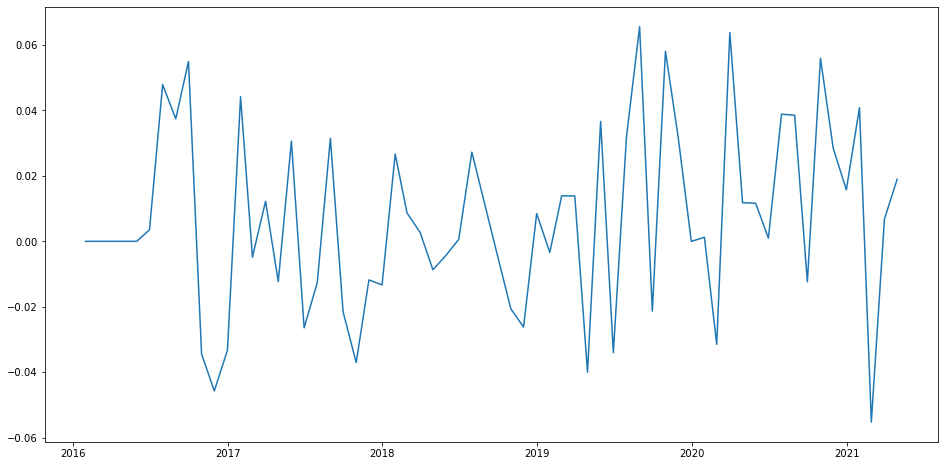

In [108]:
winners = np.nansum(momentum_portfolio_return[4], axis=1)
losers = np.nansum(momentum_portfolio_return[0], axis=1)

wml = winners - losers
print('wml monthly return', round(wml.mean()*100,3))
plt.figure(figsize=(16, 8)) 
plt.plot(dates,wml)
plt.show()

In [109]:
ben = np.nansum(benchmark_return, axis=1)

No handles with labels found to put in legend.


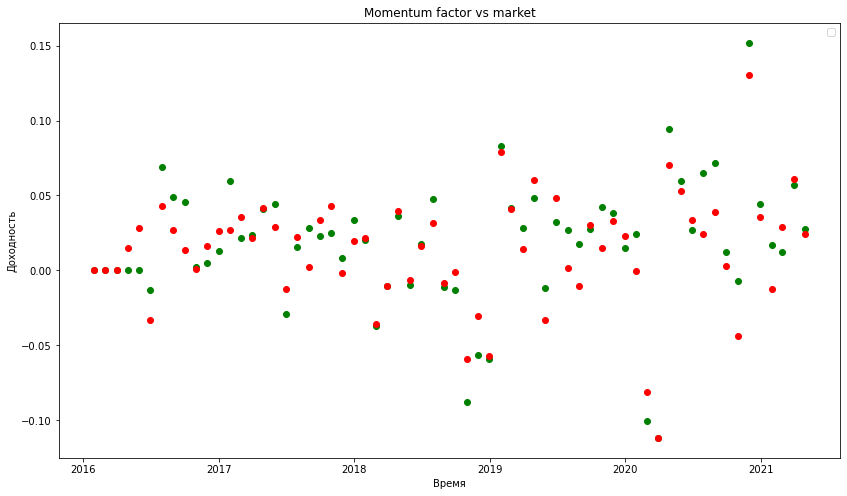

In [112]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = plt.scatter(dates, winners, color='green')
ax = plt.scatter(dates, ben, color='red')
plt.xlabel("Время")
plt.ylabel("Доходность")
plt.title('Momentum factor vs market')
plt.legend()

plt.show()

In [114]:
import scipy

In [115]:
scipy.stats.ttest_1samp(wml, 0)

Ttest_1sampResult(statistic=1.8340099610907683, pvalue=0.07137624417796666)